In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 168s 1us/step


(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

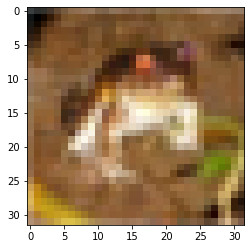

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train[0].max()

255

# Preprocessing

In [7]:
x_train=x_train/255
x_test=x_test/255

## Labelling

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

# Model 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
32*32*3

3072

In [12]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 by 32 * 3(color image) to 3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [16]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4969 - accuracy: 0.4635 - val_loss: 1.3606 - val_accuracy: 0.5217
Epoch 2/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1538 - accuracy: 0.5976 - val_loss: 1.1168 - val_accuracy: 0.6045
Epoch 3/15
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0012 - accuracy: 0.6535 - val_loss: 1.0932 - val_accuracy: 0.6275
Epoch 4/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8987 - accuracy: 0.6913 - val_loss: 1.0412 - val_accuracy: 0.6409
Epoch 5/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8165 - accuracy: 0.7201 - val_loss: 1.0633 - val_accuracy: 0.6393
Epoch 6/15
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7513 - accuracy: 0.7422 - val_loss: 1.1269 - val_accuracy: 0.6385
Epoch 7/15
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6986 - accuracy: 0.7633 - val_loss: 1.1502 -

In [17]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

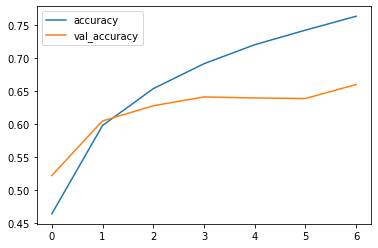

In [18]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

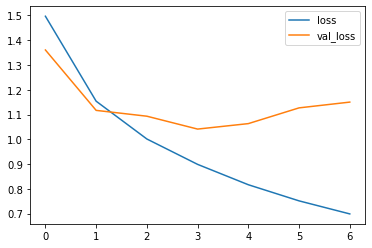

In [19]:
losses[['loss','val_loss']].plot()

In [20]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1501564979553223, 0.6597999930381775]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(x_test)
predictions=np.argmax(predictions, axis=1)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.74      0.65      1000
           1       0.75      0.81      0.78      1000
           2       0.64      0.48      0.55      1000
           3       0.52      0.46      0.49      1000
           4       0.64      0.62      0.63      1000
           5       0.69      0.47      0.56      1000
           6       0.91      0.60      0.72      1000
           7       0.63      0.78      0.70      1000
           8       0.68      0.84      0.75      1000
           9       0.64      0.80      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



# Predictions

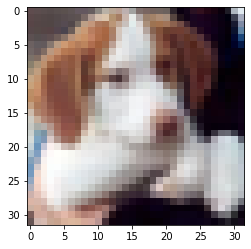

In [25]:
my_image = x_test[16]
plt.imshow(my_image)

In [26]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=1)

array([5], dtype=int64)